### K-means for Batters

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load your clean file
bat = pd.read_csv("csv_files/batters_pca_features.csv")

# keep only features used for clustering
features = ['Overall_Offensive_Production','Speed_and_Baserunning_Aggression',
            'Contact_and_OnBase_Efficiency','Experience_and_Longevity',
            'Plate_Toughness_and_Intentionality','Situational_Contact_Hitting',
            'Patience_vs_Strikeout_Profile','Gap_Power_and_Doubles_Ability',
            'Productive_Baserunning','Salary']

X = bat[features].copy()

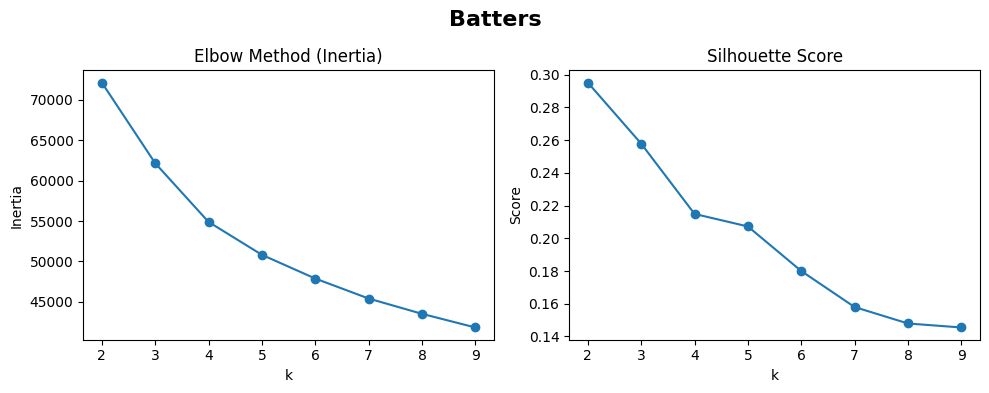

In [2]:
def make_inertia_silhouette_graphs(X, title):
    inertias, silhouettes = [], []
    K = range(2, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    plt.figure(figsize=(10,4))
    plt.suptitle(title, fontsize=16, fontweight='bold', y=.97)    
    
    plt.subplot(1,2,1)
    plt.plot(K, inertias, 'o-')
    plt.title("Elbow Method (Inertia)")
    plt.xlabel("k")
    plt.ylabel("Inertia")
    
    plt.subplot(1,2,2)
    plt.plot(K, silhouettes, 'o-')
    plt.title("Silhouette Score")
    plt.xlabel("k")
    plt.ylabel("Score")
    
    plt.tight_layout()
    plt.show()

make_inertia_silhouette_graphs(X, "Batters")

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=100)
bat['Cluster'] = kmeans.fit_predict(X)

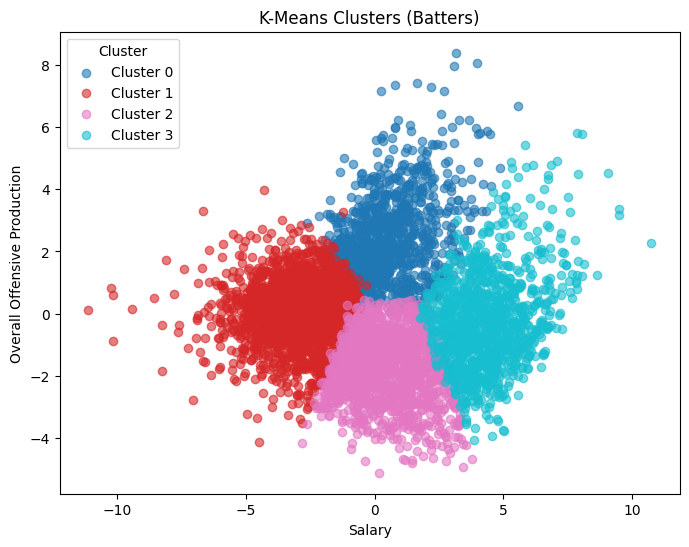

In [4]:
from sklearn.decomposition import PCA
import numpy as np

# 'Slicing' the data in 10 dimensions to a 2D representation, this is a comparison of the PCA metrics for Salary and Overall_Offensive_Production
pca_vis = PCA(n_components=10, random_state=42)
proj = pca_vis.fit_transform(X)

plt.figure(figsize=(8,6))
colors = plt.cm.tab10(np.linspace(0, 1, 4))
for cluster_id, color in zip(sorted(bat['Cluster'].unique()), colors):
    subset = proj[bat['Cluster'] == cluster_id]
    plt.scatter(subset[:, 0], subset[:, 1], color=color, alpha=0.6, label=f'Cluster {cluster_id}')

plt.title("K-Means Clusters (Batters)")
plt.xlabel("Salary")
plt.ylabel("Overall Offensive Production")
plt.legend(title="Cluster", loc="best")
plt.show()

In [5]:
bat.groupby('Cluster')[features].mean().round(2)

,Overall_Offensive_Production,Speed_and_Baserunning_Aggression,Contact_and_OnBase_Efficiency,Experience_and_Longevity,Plate_Toughness_and_Intentionality,Situational_Contact_Hitting,Patience_vs_Strikeout_Profile,Gap_Power_and_Doubles_Ability,Productive_Baserunning,Salary
Cluster,,,,,,,,,,
0,1.87,1.28,-0.05,-0.39,0.02,0.25,-0.09,0.09,0.00,-0.86
1,-1.92,0.04,0.37,-0.35,-0.09,0.11,0.09,-0.07,0.04,-2.24
2,-0.99,-0.43,-0.23,0.64,0.17,-0.24,-0.06,0.08,-0.05,1.42
3,2.80,-0.83,-0.34,0.27,-0.06,-0.16,0.00,-0.05,-0.01,3.22


In [6]:
# Mapping based on interpretation of the above mean of PCA metrics per cluster
cluster_map = {
    0: 'Underpaid_Performer',
    1: 'Developing_Low_Cost_Player',
    2: 'Overpaid_Underperformer',
    3: 'Well_Paid_Performer'
}

bat['Cluster_Label'] = bat['Cluster'].map(cluster_map)

final_cols = [
    'Name', 'Team', 'Year',
    'Overall_Offensive_Production',
    'Speed_and_Baserunning_Aggression',
    'Contact_and_OnBase_Efficiency',
    'Experience_and_Longevity',
    'Plate_Toughness_and_Intentionality',
    'Situational_Contact_Hitting',
    'Patience_vs_Strikeout_Profile',
    'Gap_Power_and_Doubles_Ability',
    'Productive_Baserunning',
    'Salary',
    'Cluster', 'Cluster_Label'
]

final_bat = bat[final_cols].copy()

final_bat.to_csv("csv_files/batters_clustered_final.csv", index=False)

In [7]:
final_bat.groupby('Cluster_Label').size()

Cluster_Label
Developing_Low_Cost_Player    1985
Overpaid_Underperformer       1294
Underpaid_Performer           1075
Well_Paid_Performer           1096
dtype: int64

In [8]:
bat_team_clusters = final_bat.groupby(['Cluster_Label', 'Team', 'Year']).size().reset_index(name='Count').sort_values(['Team', 'Year'])
bat_team_clusters = bat_team_clusters.reset_index(drop=True)
bat_team_clusters.to_csv('csv_files/batter_clusters_by_team.csv')

### K-Means for Pitchers

In [9]:
pit = pd.read_csv("csv_files/pitchers_pca_features.csv")
features = ['Workload_and_Volume', 'Run_Prevention',
            'Command_and_Control', 'Stamina_and_CompleteGames',
            'Bullpen_Leverage','Strikeout_Dominance', 'Veteran_Pitching_Style',
            'Mechanical_Volatility', 'Pressure_Composure', 'Relief_Effectiveness', 
            'Overall_Performance_Value', 'Sabermetric_Efficiency', 'Salary']

X = pit[features].copy()

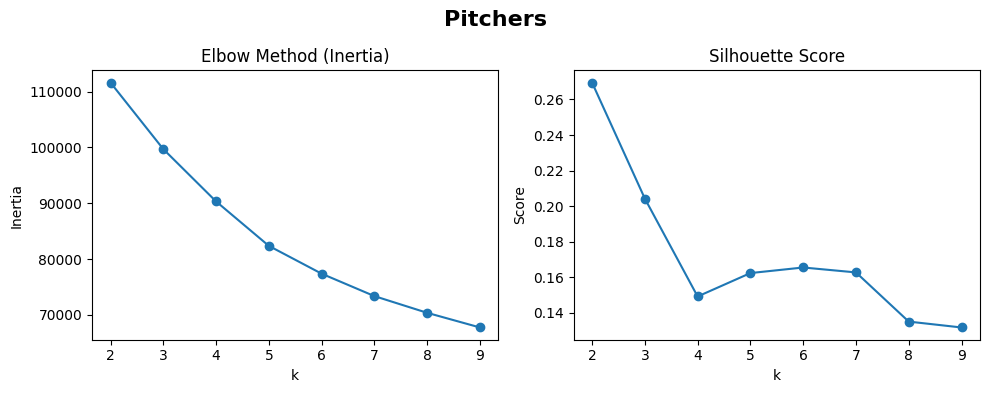

In [10]:
make_inertia_silhouette_graphs(X, "Pitchers")

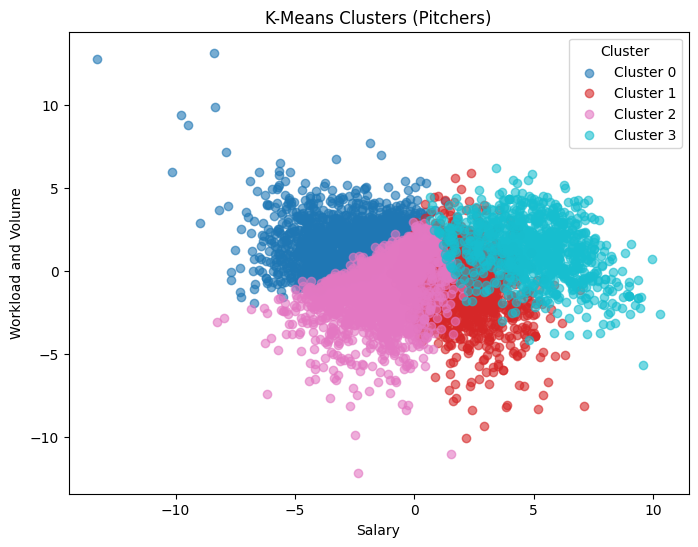

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=100)
pit['Cluster'] = kmeans.fit_predict(X)

pca_vis = PCA(n_components=13, random_state=42)
proj = pca_vis.fit_transform(X)

plt.figure(figsize=(8,6))
colors = plt.cm.tab10(np.linspace(0, 1, 4))
for cluster_id, color in zip(sorted(pit['Cluster'].unique()), colors):
    subset = proj[pit['Cluster'] == cluster_id]
    plt.scatter(subset[:, 0], subset[:, 1], color=color, alpha=0.6, label=f'Cluster {cluster_id}')

plt.title("K-Means Clusters (Pitchers)")
plt.xlabel("Salary")
plt.ylabel("Workload and Volume")
plt.legend(title="Cluster", loc="best")
plt.show()

In [12]:
pit.groupby('Cluster')[features].mean().round(2)

,Workload_and_Volume,Run_Prevention,Command_and_Control,Stamina_and_CompleteGames,Bullpen_Leverage,Strikeout_Dominance,Veteran_Pitching_Style,Mechanical_Volatility,Pressure_Composure,Relief_Effectiveness,Overall_Performance_Value,Sabermetric_Efficiency,Salary
Cluster,,,,,,,,,,,,,
0,-2.16,1.05,-0.20,0.36,-0.20,0.02,-0.22,-0.13,-0.04,0.04,0.01,0.09,-2.42
1,-0.31,-1.16,-0.01,-0.46,0.57,0.30,0.40,0.30,0.10,0.08,0.02,-0.00,2.54
2,0.44,-1.08,0.25,0.07,-0.24,-0.20,-0.28,-0.16,-0.03,-0.01,-0.00,-0.10,-1.60
3,2.77,2.27,-0.22,-0.11,0.06,0.02,0.43,0.14,0.01,-0.16,-0.04,0.09,3.81


In [13]:
# Mapping based on interpretation of the above mean of PCA metrics per cluster
cluster_map = {
    0: 'Underpaid_Performer',
    1: 'Overpaid_Underperformer',
    2: 'Developing_Low_Cost_Player',
    3: 'Well_Paid_Performer'
}

pit['Cluster_Label'] = pit['Cluster'].map(cluster_map)

final_cols = [
    'Name', 'Team', 'Year',
    'Workload_and_Volume', 'Run_Prevention',
    'Command_and_Control', 'Stamina_and_CompleteGames',
    'Bullpen_Leverage','Strikeout_Dominance', 'Veteran_Pitching_Style',
    'Mechanical_Volatility', 'Pressure_Composure', 'Relief_Effectiveness', 
    'Overall_Performance_Value', 'Sabermetric_Efficiency', 'Salary',
    'Cluster', 'Cluster_Label'
]

final_pit = pit[final_cols].copy()

final_pit.to_csv("csv_files/pitcher_clustered_final.csv", index=False)

In [14]:
final_pit.groupby('Cluster_Label').size()

Cluster_Label
Developing_Low_Cost_Player    1993
Overpaid_Underperformer       1191
Underpaid_Performer           1386
Well_Paid_Performer            925
dtype: int64

In [15]:
pit_team_clusters = final_pit.groupby(['Cluster_Label', 'Team', 'Year']).size().reset_index(name='Count').sort_values(['Team', 'Year'])
pit_team_clusters = pit_team_clusters.reset_index(drop=True)
pit_team_clusters.to_csv('csv_files/pitcher_clusters_by_team.csv')